### Rozkład Benforda dla głosów oddanych na partie w wyborach 2019 

[Rozkład Benforda](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_Benforda)  – rozkład prawdopodobieństwa występowania określonej pierwszej cyfry w wielu rzeczywistych danych statystycznych, np. dotyczących powierzchni jezior, danych z rocznika statystycznego, wartościach stałych fizycznych. Ogólnie rozkład ten sprawdza się w przypadku wielkości, które mogą przyjmować różne rzędy wielkości. Fakt częstego występowania tego rozkładu w obserwowanych danych zwany jest prawem Benforda. 

Prawdopodobieństwo wystąpienia cyfry $k$ to: 
$$
P_k = \log_{10}(1+\frac{1}{k})
$$

Rozkład Benforda jest stosowany do sprawdzania poprawności zeznań podatkowych bądź defraudacji, gdyż ludzie wpisując liczby tak, żeby wydawały się przypadkowe, nie są świadomi, że pewne cyfry występują częściej na pierwszej pozycji.

Częstotliwości występowania cyfr na pierwszej pozycji są przedstawione w tabeli poniżej. 

| c | P(c)  |
|---|-------|
| 1 | 30.1% |
| 2 | 17.6% |
| 3 | 12.5% |
| 4 | 9.7%  |
| 5 | 7.9%  |
| 6 | 6.7%  |
| 7 | 5.8%  |
| 8 | 5.1%  |
| 9 | 4.6%  |

Wykres rozkładu został zaprezentowany kilka komórek ponżej.

-----------------------------
Dodatkowe informacje:

https://en.wikipedia.org/wiki/Benford%27s_law

https://matematyka.poznan.pl/artykul/prawo-benforda-czyli-o-niezmienniczosci-rozkladow/

In [1]:
#import pakietów i funkcji, które wykorzystam
import requests, zipfile, io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chisquare
sns.set()

Text(0.5, 0, 'c')

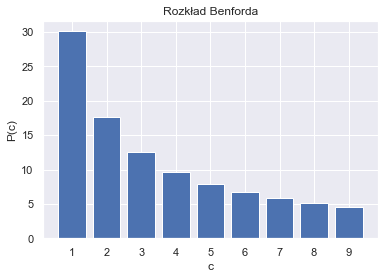

In [2]:
#rysunek rozkładu
BENFORD = np.array([30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6])
plt.bar(np.arange(1,10), BENFORD)
plt.xticks(np.arange(1, 10, 1.0))
plt.title('Rozkład Benforda')
plt.ylabel('P(c)')
plt.xlabel('c')

Sprawdźmy jak się ma ww. rozkład do wyników wyborów do sejmu w 2019 r.

In [3]:
#dostęp na 26/11/2019
response = requests.get('https://wybory.gov.pl/sejmsenat2019/data/csv/wyniki_gl_na_listy_po_obwodach_sejm_csv.zip')
zipfile.ZipFile(io.BytesIO(response.content)).extractall()

In [4]:
#wczytuję dane
d = pd.read_csv('wyniki_gl_na_listy_po_obwodach_sejm.csv', sep=';')
d.head(2)

,Symbol kontrolny,Kod TERYT,Okręg,Numer,Typ obszaru,Typ obwodu,Siedziba,Gmina,Powiat,Województwo,...,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19,KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19
0,6a18-a07e-c240-e60e-2b2c-d9ee-4b6f-30b6,20101,1,1,miasto,stały,"Szkoła Podstawowa Nr 3, ul. Ceramiczna 5, 59-7...",m. Bolesławiec,bolesławiecki,dolnośląskie,...,202,NaN,72,46,NaN,368,NaN,145,49.0,NaN
1,87e0-d41a-ce4f-cde5-c934-67c7-4577-0bdd,20101,1,2,miasto,stały,"Szkoła Podstawowa Nr 3, ul. Ceramiczna 5, 59-7...",m. Bolesławiec,bolesławiecki,dolnośląskie,...,223,NaN,57,41,NaN,307,NaN,196,46.0,NaN


In [5]:
#zmiana nazw kolumn na czytelniejsze
d.rename(columns={
                    d.columns[32:][0]:'po',
                    d.columns[32:][1]:'emeryt',
                    d.columns[32:][2]:'konfederacja',
                    d.columns[32:][3]:'psl',
                    d.columns[32:][4]:'prawica',
                    d.columns[32:][5]:'pis',
                    d.columns[32:][6]:'liroy',
                    d.columns[32:][7]:'sld',
                    d.columns[32:][8]:'bezpartyjni',
                    d.columns[32:][9]:'mniejszosc'
                }, inplace=True)

In [6]:
#usuwam te kolumny gdzie większość (>50%) jest null
d = d.loc[:, (d.isnull().sum(axis=0)/len(d) < 0.5)]

Dalej liczymy rozkład Benforda dla głosów na poszczególne partie. Przetestujemy hipotezy:
- $H_0$: Rozkład głosów odpowiada prawu Benforda.
- $H_1$: Rozkład głosów nie odpowiada prawu Benforda.      

In [7]:
#funkcja obliczająca rozkład danych, robiąca test chi kwadrat i interpretująca wynik
def benford(d, col):
    
    #print(col)
    
    #zliczam liczności pierwszych cyfr i dzielę przez łączną liczbę
    ben = d[col].apply(lambda x: str(x)[0]).value_counts().sort_index()/d[col].count() 
    
    #test chi kwadrat    
    if(len(ben)==10):
        s, p = chisquare(ben[1:].values*100, f_exp=BENFORD)
    else:
        s, p = chisquare(ben.values*100, f_exp=BENFORD) 
    
    prob = 0.95
    
    # interpetacja p
    alpha = 1.0 - prob
    
    if p <= alpha:
        return[col, 'Odrzucamy H0, czyli rozkład NIE odpowiada rozkładowi Benforda!', 1]
    else:
        return[col, 'Nie udaje się odrzucić H0, czyli liczba głosów odpowiada rozkładowi Benforda', 0]

['po', 'Nie udaje się odrzucić H0, czyli liczba głosów odpowiada rozkładowi Benforda', 0]
['konfederacja', 'Nie udaje się odrzucić H0, czyli liczba głosów odpowiada rozkładowi Benforda', 0]
['psl', 'Nie udaje się odrzucić H0, czyli liczba głosów odpowiada rozkładowi Benforda', 0]
['pis', 'Odrzucamy H0, czyli rozkład NIE odpowiada rozkładowi Benforda!', 1]
['sld', 'Nie udaje się odrzucić H0, czyli liczba głosów odpowiada rozkładowi Benforda', 0]


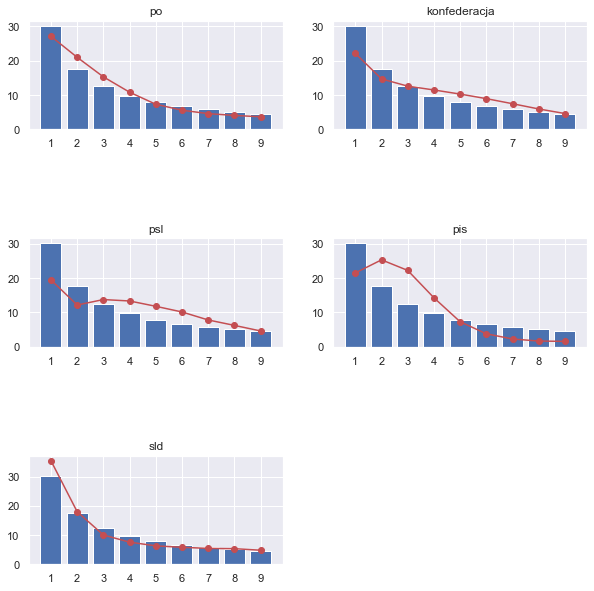

In [8]:
#testuję i rysuję wykresy dla poszczególnych partii
f = plt.figure(figsize=(10,10))
f.subplots_adjust(hspace=1)


for i, partia in enumerate(d.columns[-5:]):
    plt.subplot(3, 2, i+1)
    ben = d[partia].apply(lambda x: str(x)[0]).value_counts().sort_index()/d[partia].count()
    plt.plot(np.arange(1,10), 100*ben[1:], 'o-', c='r')
    plt.xticks(np.arange(1, 10, 1.0))
    plt.bar(np.arange(1,10), BENFORD)
    plt.title(partia)
    
    print(benford(d, partia))

Jedynie głosy na PiS nie zachowują się zgodnie z rozkładem. Sprawdzamy jak się rozłożyły głosy na poszczególne partie po województwach (0 - wyniki są zgodne z rozkładem, 1 - nie są zgodne)

In [9]:
w=[]
for partia in d.columns[-5:]: 
    for woj in d['Województwo'].unique():
        w.append({'partia': partia, 
                  'woj': woj,
                  'rozkl': benford(d[d['Województwo']==woj], partia)[2]})
w = pd.DataFrame(w).pivot(index='woj', columns='partia',values='rozkl')
w

partia,konfederacja,pis,po,psl,sld
woj,,,,,
dolnośląskie,0,1,0,1,0
kujawsko-pomorskie,0,1,0,1,0
lubelskie,0,0,0,0,0
lubuskie,0,1,0,0,0
mazowieckie,0,1,0,1,0
małopolskie,0,1,0,0,0
opolskie,0,0,0,0,0
podkarpackie,0,1,0,0,0
podlaskie,0,1,0,0,0


Liczba województw, w których wyniki danej partii nie odpowiadają rozkładowi Benforda:

In [10]:
w.sum(axis=0).sort_values(ascending=False)

partia
pis             13
psl              7
po               1
konfederacja     1
sld              0
dtype: int64

Liczba partii, których wyniki nie odpowiadają rozkładowi Bendorda w danym województwie:

In [11]:
w.sum(axis=1).sort_values(ascending=False)

woj
śląskie                4
zachodniopomorskie     2
wielkopolskie          2
pomorskie              2
mazowieckie            2
kujawsko-pomorskie     2
dolnośląskie           2
świętokrzyskie         1
łódzkie                1
podlaskie              1
podkarpackie           1
małopolskie            1
lubuskie               1
warmińsko-mazurskie    0
opolskie               0
lubelskie              0
dtype: int64

Zwizualizujemy jeszcze wyniki PiS w województwach.

Rozkład Benforda pierwszych cyfr liczby głosów oddanych na PiS w poszczególnych województwach


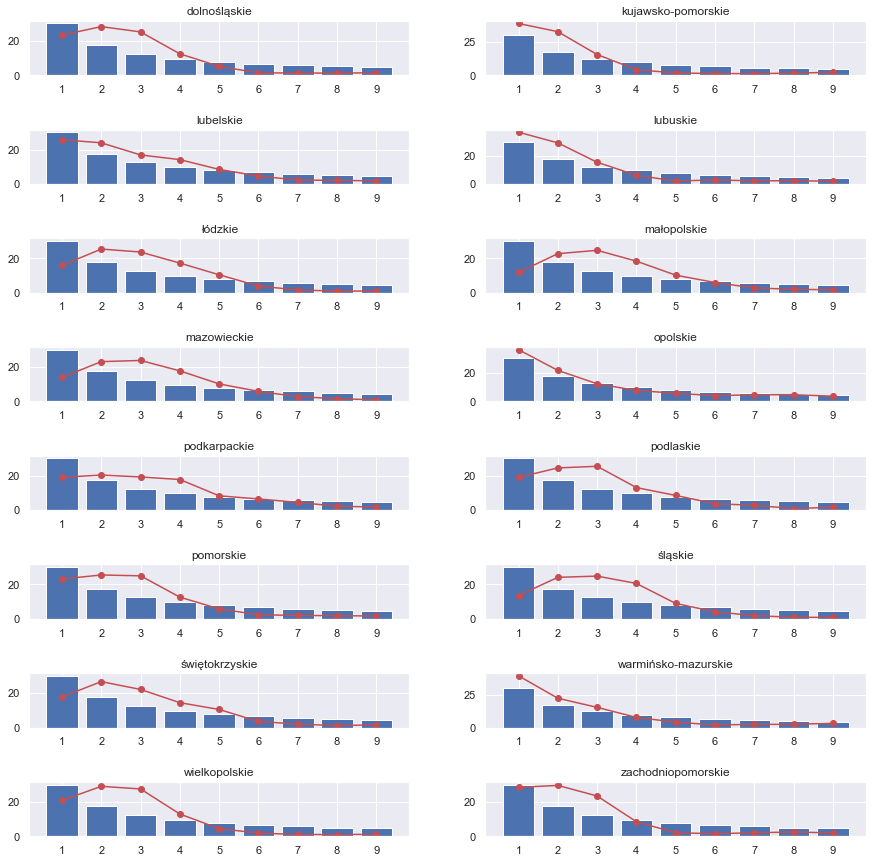

In [12]:
print('Rozkład Benforda pierwszych cyfr liczby głosów oddanych na PiS w poszczególnych województwach')
f = plt.figure(figsize=(15,15))
f.subplots_adjust(hspace=1)

for i,w in enumerate(d['Województwo'].unique()):
    plt.subplot(8, 2, i+1)
    ben = d[d['Województwo']==w]['pis'].apply(lambda x: str(x)[0]).value_counts().sort_index()/d[d['Województwo']==w]['pis'].count()
    if(len(ben)==10):
        plt.plot(np.arange(1,10), 100*ben[1:], 'o-', c='r')
    else:
        plt.plot(np.arange(1,10), 100*ben, 'o-', c='r')
    plt.xticks(np.arange(1, 10, 1.0))
    plt.bar(np.arange(1,10), BENFORD)
    plt.title(w)

#### Podsumowanie

Wynik testu $\chi^2$ dla całej Polski, w przypadku PiS wskazuje na odrzucenie $H_0$, czyli rozkład nie odpowiada rozkładowi Benforda. Spoglądając na wykres również widać, że otrzymane wyniki odbiegają od teoretycznych.

Dalsze grupowanie po województwach wskazuje, że wyniki odbiegają od rozkładu, również najczęściej w przypadku PiS, ale zdarza się to również innym partiom. W przypadku województwa śląskiego wyniki 4 na 5 partii nie zachowują się zgodnie z rozkładem, choć trzeba wziąć pod uwagę, że liczby głosów są już realtywnie małe i mogą nie być wystarczające, żeby wnioskować o rozkładzie.

Jednocześnie trzeba zaznaczyć, że nie należy wyciągać zbyt daleko idących wniosków na podstawie tak pobieżnej analizy. Zwłaszcza, że istnieją publikacje kwestionujące zasadność zastosowania rozkładu Benforda do analiz wyników wyborów [[1](https://web.archive.org/web/20140517120934/http://vote.caltech.edu/sites/default/files/benford_pdf_4b97cc5b5b.pdf)], [[2](https://doi.org/10.1063/1.166498)].
